In [1]:
#Linear Regression 
import numpy as np
import pandas as pd

In [2]:
#Importing the file
df1=pd.read_csv("linear_regression.csv")
df1.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df1.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# checking if data is clean
df1.isna().any()

Hours     False
Scores    False
dtype: bool

In [10]:
df1.value_counts()

Hours  Scores
9.2    88        1
4.5    41        1
1.5    20        1
1.9    24        1
2.5    21        1
       30        1
2.7    25        1
       30        1
3.2    27        1
3.3    42        1
3.5    30        1
3.8    35        1
4.8    54        1
8.9    95        1
5.1    47        1
5.5    60        1
5.9    62        1
6.1    67        1
6.9    76        1
7.4    69        1
7.7    85        1
7.8    86        1
8.3    81        1
8.5    75        1
1.1    17        1
dtype: int64

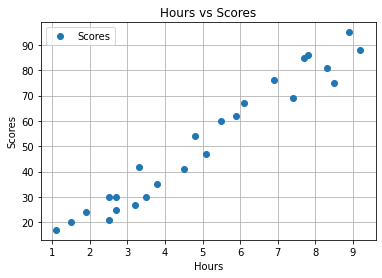

In [6]:
#Hours vs Scores graph
import matplotlib.pyplot as plt
%matplotlib inline
df1.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.grid(True)
plt.ylabel("Scores")
plt.show()

In [7]:
#Training the model
msk=np.random.rand(len(df1)) <0.8
train=df1[msk]
test=df1[~msk]

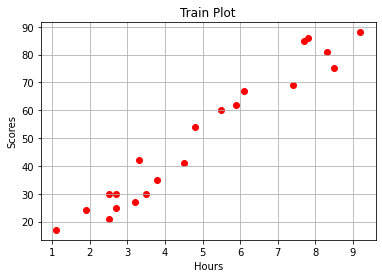

In [8]:
#Plot from training data
plt.scatter(train.Hours,train.Scores,color="red")
plt.xlabel("Hours")
plt.title("Train Plot")
plt.grid(True)
plt.ylabel("Scores")
plt.show()

In [9]:
#Coefficient and Intercept
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['Hours']])
train_y=np.asanyarray(train[['Scores']])
regr.fit(train_x,train_y)
print("Coefficient:",regr.coef_)
print("Intercept:",regr.intercept_)

Coefficient: [[9.58353869]]
Intercept: [2.99304138]


94.03665892182403


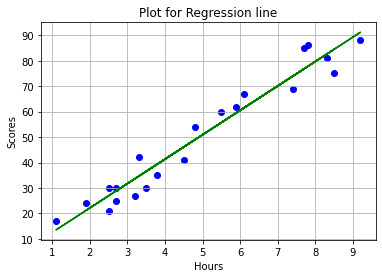

In [10]:
#Ploting the regression line
plt.scatter(train.Hours,train.Scores,color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],'-g')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Plot for Regression line")
plt.grid(True)
print(regr.coef_[0][0]*9.5+regr.intercept_[0])

In [11]:
#predicting the output
print("Scores:",regr.predict([[9.25]]))

Scores: [[91.64077425]]


In [12]:
#Error finding
X = df1.iloc[:, :-1].values  
y = df1.iloc[:, 1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
y_pred=regr.predict(X_test)

In [14]:
from sklearn import metrics
print('Mean absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('R2-score:',metrics.r2_score(y_test,y_pred))

Mean absolute Error: 3.943087141214302
Squared Error: 18.153776925046834
R2-score: 0.954184895707029
